In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, 
                             precision_recall_fscore_support)
import pickle

## 1. EDA trên tập dữ liệu iris.csv

In [34]:
df = pd.read_csv("iris.csv")
# Loại bỏ cột 'Id' nếu không cần thiết
df = df.drop(columns=["Id"])

### a. Có bao nhiêu đặc trưng và tên đặc trưng

In [35]:
feature_names = df.columns.drop("Species")
print("Các đặc trưng:", feature_names.tolist())
print("Số lượng đặc trưng:", len(feature_names))

Các đặc trưng: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Số lượng đặc trưng: 4


### b. Có bao nhiêu chủng loài 

In [36]:
species_unique = df["Species"].unique()
print("Các chủng loài:", species_unique)
print("Số lượng chủng loài:", len(species_unique))

Các chủng loài: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Số lượng chủng loài: 3


### c. Tổng quan dữ liệu kiểu dữ liệu và dữ liệu thiếu 

In [37]:
print("\nThông tin dữ liệu:")
print(df.info())
print("\nSố lượng giá trị thiếu:\n", df.isnull().sum())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Số lượng giá trị thiếu:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### d. Thống kê các đại lượng cơ bản cho các đặc trưng 

In [38]:
print("\nThống kê mô tả của dữ liệu:")
print(df.describe())


Thống kê mô tả của dữ liệu:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


### e. Thống kê các đại lượng cơ bản cho các đặc trưng theo nhóm chủng loại 

In [39]:
print("\nThống kê mô tả theo Species:")
print(df.groupby("Species").describe())


Thống kê mô tả theo Species:
                SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                  

### f. Trực quan phân phối các đặc trưng và nhận xét 

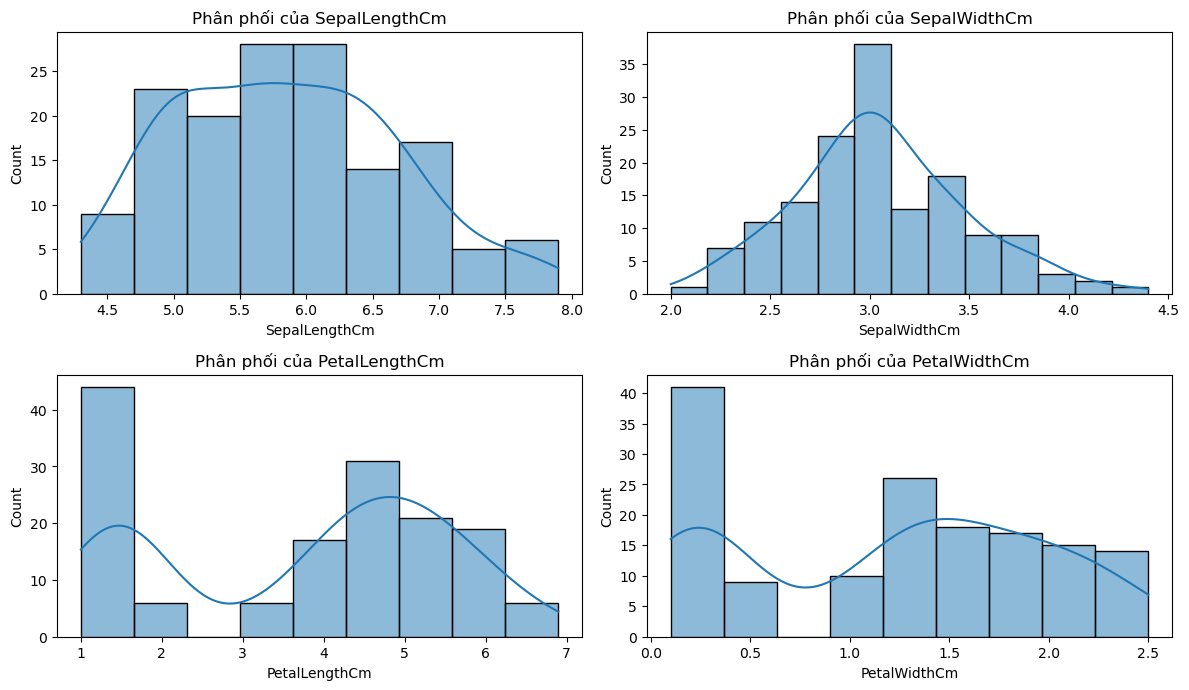

In [40]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(feature_names):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Phân phối của {col}")
plt.tight_layout()
plt.show()

### g. Trực quan phân phối các đặc trưng theo nhóm chủng loài và nhận xét 

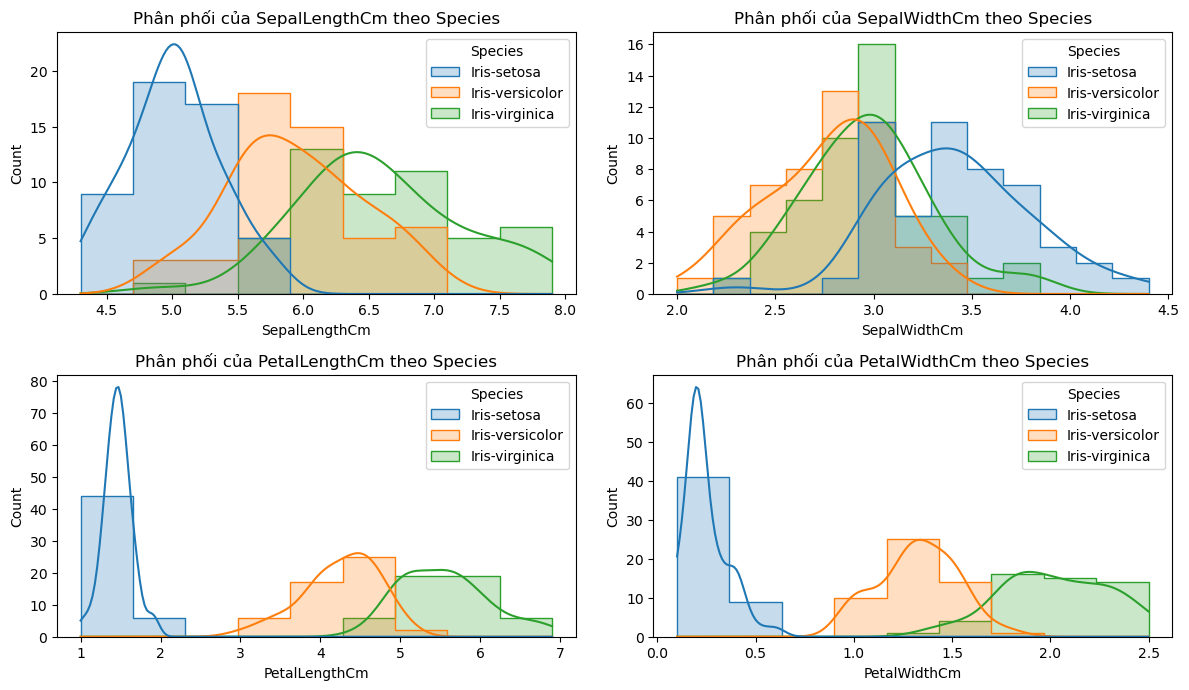

In [41]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(feature_names):
    plt.subplot(3, 2, i+1)
    sns.histplot(data=df, x=col, hue="Species", kde=True, element="step")
    plt.title(f"Phân phối của {col} theo Species")
plt.tight_layout()
plt.show()

### h. Khám phá các giá trị bất thường của các đặc trưng theo nhóm chủng loài

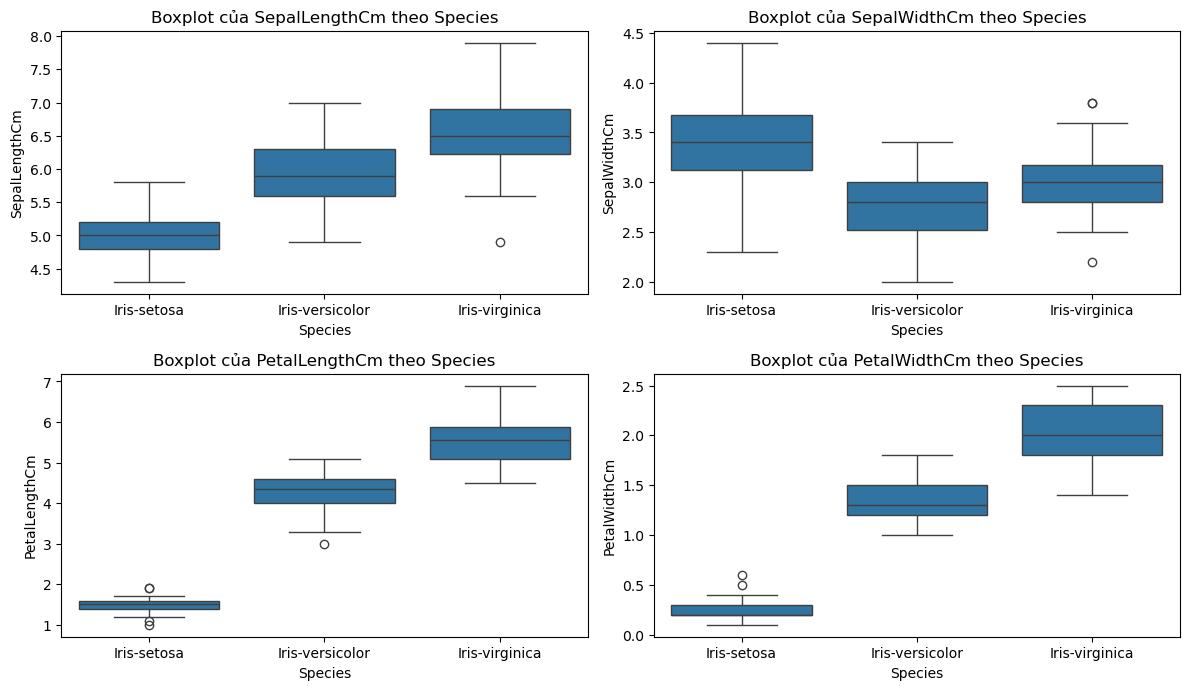

In [42]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(feature_names):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=df, x="Species", y=col)
    plt.title(f"Boxplot của {col} theo Species")
plt.tight_layout()
plt.show()

## 2. Tập dữ liệu sử dụng tỉ lệ train:test là 75:25 với hệ số ngẫu nhiên là 16 

In [43]:
X = df[feature_names]
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

## 3. Sử dụng biểu đồ để tìm giá trị K tốt nhất cho mô hình K-NN dựa theo độ đo chính xác để đánh giá. 

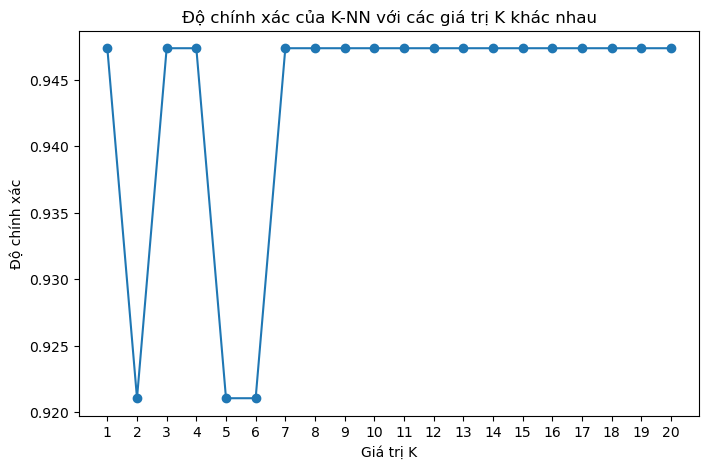

Giá trị K tốt nhất: 1


In [44]:
accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.xlabel("Giá trị K")
plt.ylabel("Độ chính xác")
plt.title("Độ chính xác của K-NN với các giá trị K khác nhau")
plt.xticks(k_range)
plt.show()

best_k = k_range[np.argmax(accuracies)]
print("Giá trị K tốt nhất:", best_k)

## 4. Sử dụng giá trị K tốt nhất để xây dựng mô hình 

In [45]:
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 5. Cho biết độ đo chính xác (accuracy) trên tập dữ liệu đánh giá (test data set) 

In [46]:
y_test_pred = knn_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Độ chính xác trên tập test:", test_accuracy)

Độ chính xác trên tập test: 0.9473684210526315


## 6. Xây dựng ma trận confusion matrix của mô hình trên tập dữ liệu test 

In [47]:
cm = confusion_matrix(y_test, y_test_pred, labels=species_unique)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  0]
 [ 0  2  8]]


## 7. Với chủng loại: Iris-setosa 

### a. Hãy cho biết các giá trị: [tn, fp, fn, tp], [TPR, FNR, FPR, TNR], [precision, recal, F1] 

In [48]:
y_test_binary = (y_test == "Iris-setosa").astype(int)
y_pred_binary = (y_test_pred == "Iris-setosa").astype(int)
cm_binary = confusion_matrix(y_test_binary, y_pred_binary)
print("\nConfusion Matrix (Iris-setosa vs Non-setosa):\n", cm_binary)
tn, fp, fn, tp = cm_binary.ravel()
print(f"tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}")


Confusion Matrix (Iris-setosa vs Non-setosa):
 [[25  0]
 [ 0 13]]
tn: 25, fp: 0, fn: 0, tp: 13


In [49]:
# Tính các chỉ số: TPR, FNR, FPR, TNR
TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
FNR = fn / (tp + fn) if (tp + fn) > 0 else 0
FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
TNR = tn / (fp + tn) if (fp + tn) > 0 else 0
print(f"TPR: {TPR:.2f}, FNR: {FNR:.2f}, FPR: {FPR:.2f}, TNR: {TNR:.2f}")

TPR: 1.00, FNR: 0.00, FPR: 0.00, TNR: 1.00


In [50]:
# Tính precision, recall và F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test_binary, y_pred_binary, average='binary')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Precision: 1.00, Recall: 1.00, F1: 1.00


### b. Vẽ đồ thị AUC & ROC 

In [51]:
# Lấy xác suất dự đoán cho lớp Iris-setosa
probs = knn_best.predict_proba(X_test)

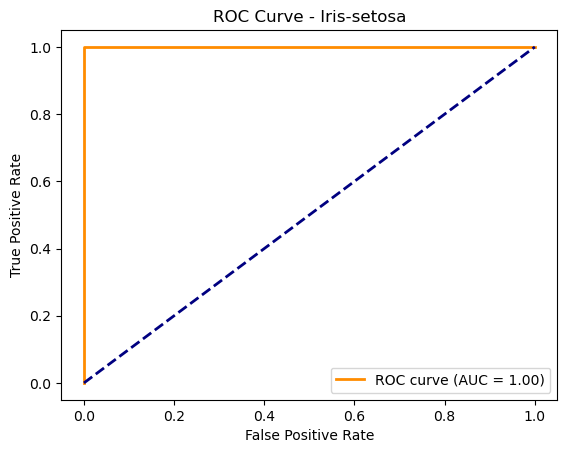

In [52]:
# Tìm vị trí của lớp Iris-setosa
class_index = list(knn_best.classes_).index("Iris-setosa")
fpr_vals, tpr_vals, thresholds = roc_curve(y_test_binary, probs[:, class_index])
roc_auc = auc(fpr_vals, tpr_vals)
plt.figure()
plt.plot(fpr_vals, tpr_vals, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Iris-setosa')
plt.legend(loc="lower right")
plt.show()

## 8. Lưu trữ mô hình với tên file iris_knn 

In [53]:
with open("iris_knn.sav", "wb") as f:
    pickle.dump(knn_best, f)
print("Mô hình đã được lưu thành file 'iris_knn.sav'")

Mô hình đã được lưu thành file 'iris_knn.sav'


## 9. Xây dựng chương trình dự báo chủng loại dựa trên các đặc trưng đầu vào. 

In [56]:
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    # Tải mô hình đã lưu từ file .sav
    with open("iris_knn.sav", "rb") as f:
        model = pickle.load(f)
    # Chuyển đầu vào thành DataFrame với các tên cột tương ứng
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], 
                              columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
    prediction = model.predict(input_data)
    return prediction[0]

## 10. Với các đặc trưng SepalLengthCm=4.5, SepalWidthCm=2.7, PetalLengthCm=2.0, PetalWidthCm=0.24 thì mô hình phân lớp sẽ dự báo là chủng loại nào?  

In [57]:
#    SepalLengthCm=4.5, SepalWidthCm=2.7, PetalLengthCm=2.0, PetalWidthCm=0.24
predicted_species = predict_species(4.5, 2.7, 2.0, 0.24)
print("Dự báo chủng loại cho đặc trưng đã cho là:", predicted_species)

Dự báo chủng loại cho đặc trưng đã cho là: Iris-setosa
